# **Test task 1 (Borys Melnychuk)**

Задача 1: Прогнозування попиту

Мета: Розробити систему прогнозування попиту на
короткостроковий період (14 днів) через 7 днів від останньої дати в
даних, для всіх груп товарів.

Опис:

1. Використовуючи надані дані про транзакції, створіть дві моделі
прогнозування:
 - Модель машинного навчання.
 - Класичну модель прогнозування часових рядів.
2. Дайте обґрунтовані коментарі щодо вибору методів та підходів,
поясніть, чому ви обрали саме їх.

3. Надати скрипт або ноутбук (.py/.ipynb), який буде містити
технічне рішення та можливість розрахунку прогнозу на майбутній
період (scoring).
Очікуваний результат: Файл з кодом (.py або .ipynb), який включає
дві моделі прогнозування, пояснення вибору методів, і можливість
розрахунку прогнозу на майбутній період.

# **Table of Contents**

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Dataset description](#1)
2. [Data loading](#2)
3. [EDA](#3)
4. [Data preprocessing / Feature engineering](#4)
5. [Classic model (SARIMA)](#5)
6. [ML approach)](#6)

</div>


# **Dataset description** <a id='1'></a>

Files:

* **customers.csv** - The file contains info about customers
* **orders.csv** - The file contains info about orders
* **geolocation.csv** - The file contains info about geolocations
* **order_items.csv** - The file contains info about order items
* **order_payments.csv** - The file contains info about order payments
* **order_reviews.csv** - The file contains info about order reviews
* **products.csv** - The file contains info about products
* **product_category_name_translation.csv** - The file contains info about translations of category name from portugues to english
* **sellers.csv** - The file contains info about sellers
* **dicts/** - the folder that contains **csv** files with additional data about the dataset (I used this info to create tables representing each file)

**customers.csv**

|      Name                       |    Type          |   Description                                                         |
| ---------------------------     | ---------------- | -------------------------------------------------                     |
| customer_id                     | string           | key to the orders dataset. Each order has a unique customer_unique_id |
| customer_unique_id              | string           | unique identifier of a customer                                       |
| customer_zip_code_prefix        | string           | zip code prefix of the customer. five digits of customer zip code     |
| customer_city                   | string           | customer city name                                                    |
| customer_state                  | string           | customer state                                                        | 

**orders.csv**

|      Name                     |    Type             |   Description                                                 |
| ---------------------------   | ----------------    | -------------------------------------------------             |
| order_id                      | string              | unique identifier of the order                                |
| customer_id                   | string              | key to customer dataset. each order has a unique customer_id  |
| order_status                  | string              | reference to the order status (delivered, shipped, etc).                                           |
| order_purchase_timestamp      | YYYY-MM-DD HH-MM-SS | shows the purchase timestamp                                    |
| order_approved_at             | YYYY-MM-DD HH-MM-SS | shows the payment approval timestamp                             |
| order_delivered_carrier_date  | YYYY-MM-DD HH-MM-SS | shows the order posting timestamp. when it was handled to the logistic partner | 
| delivered_customer_date       | YYYY-MM-DD HH-MM-SS | shows the actual order delivery date to the customer                        | 
| order_estimated_delivery_date | YYYY-MM-DD HH-MM-SS | shows the estimated delivery date that was informed to the customer at the purchase time | 

**geolocation.csv**

|      Name                     |    Type            |   Description               |
| ---------------------------   | ----------------   | --------------------------- |
| geolocation_zip_code_prefix   | string             | first 5 digits of zip code  |
| geolocation_lat               | float              | latitude                    |
| geolocation_lng               | float              | longitude                   |
| geolocation_city              | string             | city name                   |
| geolocation_state             | string             | state name                  |

**order_items.csv**

|      Name           |    Type             |   Description                       |
| -----------------   | ----------------    | ---------------------------         |
| order_id            | string              | order unique identifier                     |
| order_item_id       | int                 | sequential number identifying number of items included in the same order |
| product_id          | string              | product unique identifier                   |
| seller_id           | string              | seller unique identifier     |
| shipping_limit_date | YYYY-MM-DD HH-MM-SS | shows the seller shipping limit date for handling the order over to the logistic partner. |
| price               | float               | item price                           |
| freight_value       | float               | item freight value item (if an order has more than one item the freight value is splitted between items) |

**order_payments.csv**

|      Name            |    Type             |   Description                       |
| -----------------    | ----------------    | ---------------------------         |
| order_id             | string              | unique identifier of an order                     |
| payment_sequential   | int                 | a customer may pay an order with more than one payment method. If he does so	a sequence will be created to                  |
| payment_type         | string              | method of payment chosen by the customer.	                        |
| payment_installments | int                 | number of installments chosen by the customer.	             |
| payment_value        | float               | transaction value                      |

**order_reviews.csv**

|      Name               |    Type              |   Description                       |
| -----------------       | ----------------     | ---------------------------         |
| review_id               | string               | unique review identifier                   |
| order_id                | string               | unique order identifier                     |
| review_score            | int                  | note ranging from 1 to 5 given by the customer on a satisfaction survey |
| review_comment_title    | string               | comment title from the review left by the customer in portugues         |
| review_comment_message  | string               | comment message from the review left by the customer in portugues |
| review_creation_date    | YYYY-MM-DD HH-MM-SS  | shows the date in which the satisfaction survey was sent to the customer |
| review_answer_timestamp | YYYY-MM-DD HH-MM-SS  | shows satisfaction survey answer timestamp |

**products.csv**

|      Name                  |    Type              |   Description                             |
| -----------------          | ----------------     | ---------------------------               |
| product_id                 | string               | unique product identifier                         |
| product_category_name      | string               | root category of product	in Portuguese.          |
| product_name_lenght        | int                  | number of characters extracted from the product name            |
| product_description_lenght | int                  | number of characters extracted from the product description.	             |
| product_photos_qty         | int                  | number of product published photos	 |
| product_weight_g           | int                  | product weight measured in grams       |
| product_length_cm          | int                  | product length measured in centimeters	           |
| product_height_cm          | int                  | product height measured in centimeters	           |
| product_width_cm           | int                  | product width measured in centimeters	           | 

**product_category_name_translation.csv**

|      Name                     |    Type              |   Description                                  |
| -----------------             | ----------------     | ---------------------------                    |
| product_category_name         | string               | The category name of the product in portuguese |
| product_category_name_english | string               | The Category name of the product in english    |

**sellers.csv**

|      Name              |    Type              |   Description                      |
| -----------------      | ----------------     | ---------------------------        |
| seller_id              | string               | unique seller identifier                   |
| seller_zip_code_prefix | int                  | first 5 digits of seller's zip code             |
| seller_city            | string               | seller's city name    |
| seller_state           | string               | seller's state name   |

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import pmdarima as pmd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import folium
import holidays
from xgboost import XGBRegressor, plot_importance
from tqdm import tqdm

import os

sns.set_theme()

# **Data loading** <a id='2'></a>

In [2]:
orders = pd.read_csv('./S_Data/orders.csv', parse_dates=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',	'order_delivered_customer_date', 'order_estimated_delivery_date'])
order_items = pd.read_csv('./S_Data/order_items.csv', parse_dates=['shipping_limit_date'])
order_payments = pd.read_csv('./S_Data/order_payments.csv')
order_reviews = pd.read_csv('./S_Data/order_reviews.csv', parse_dates=['review_creation_date', 'review_answer_timestamp'])

products = pd.read_csv('./S_Data/products.csv').rename(columns={
    'product_name_lenght': 'product_name_length',
    'product_description_lenght': 'product_description_length'
})
customers = pd.read_csv('./S_Data/customers.csv')
sellers = pd.read_csv('./S_data/sellers.csv')

geolocation = pd.read_csv('./S_Data/geolocation.csv')
products_translation = pd.read_csv('./S_data/product_category_name_translation.csv')

# **EDA** <a id='3'></a>

In [3]:
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0                    2017-10-18  
1                    2018-08-13  
2                    2018-09-04  
3                    2017-12-15  
4                    2018-02-26

In [4]:
orders.describe()

order_purchase_timestamp              order_approved_at  \
count                          99441                          99281   
mean   2017-12-31 08:43:12.776581120  2017-12-31 18:35:24.098800128   
min              2016-09-04 21:15:19            2016-09-15 12:16:38   
25%              2017-09-12 14:46:19            2017-09-12 23:24:16   
50%              2018-01-18 23:04:36            2018-01-19 11:36:13   
75%              2018-05-04 15:42:16            2018-05-04 20:35:10   
max              2018-10-17 17:30:18            2018-09-03 17:40:06   

        order_delivered_carrier_date  order_delivered_customer_date  \
count                          97658                          96476   
mean   2018-01-04 21:49:48.138278656  2018-01-14 12:09:19.035542272   
min              2016-10-08 10:34:01            2016-10-11 13:46:32   
25%    2017-09-15 22:28:50.249999872  2017-09-25 22:07:22.249999872   
50%              2018-01-24 16:10:58     2018-02-02 19:28:10.500000   
75%              2018-05-08 13:37:45  2018-05-15 22:48:52.249999872   
max              2018-09-11 19:48:28            2018-10-17 13:22:46   

       order_estimated_delivery_date  
count                          99441  
mean   2018-01-24 03:08:37.730111232  
min              2016-09-30 00:00:00  
25%              2017-10-03 00:00:00  
50%              2018-02-15 00:00:00  
75%              2018-05-25 00:00:00  
max              2018-11-12 00:00:00

Text(0.5, 1.0, 'Bar plot of order status')

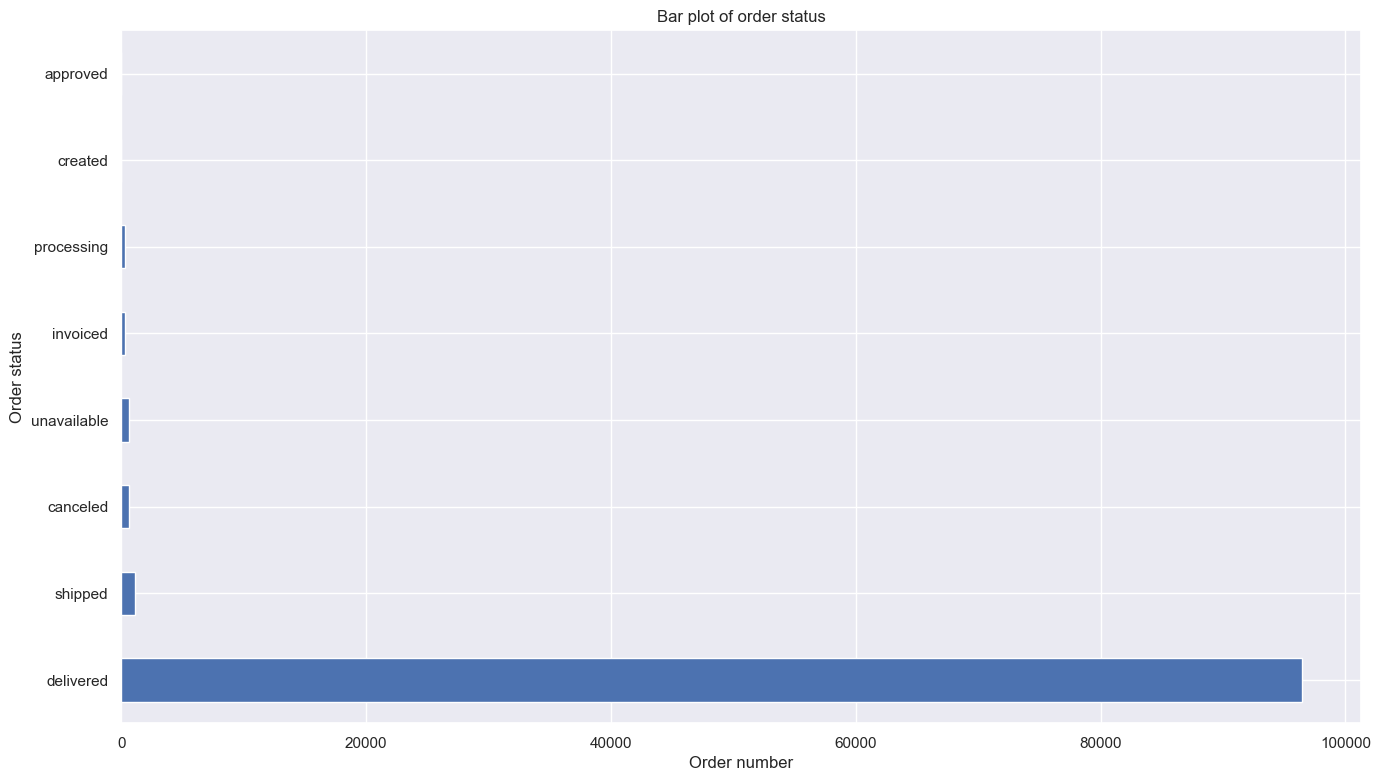

In [5]:
orders['order_status'].value_counts().plot(kind='barh', figsize=(16, 9))
plt.xlabel('Order number')
plt.ylabel('Order status')
plt.title('Bar plot of order status')

In [6]:
orders_res = orders.copy()
orders_res.index = orders_res['order_purchase_timestamp']
orders_res = orders_res.resample('1d').agg({
    'order_status': 'count'
}).rename(columns={'order_status': 'order_number'})

Text(2017-03-01 00:00:00, 900, 'Black Friday 2017')

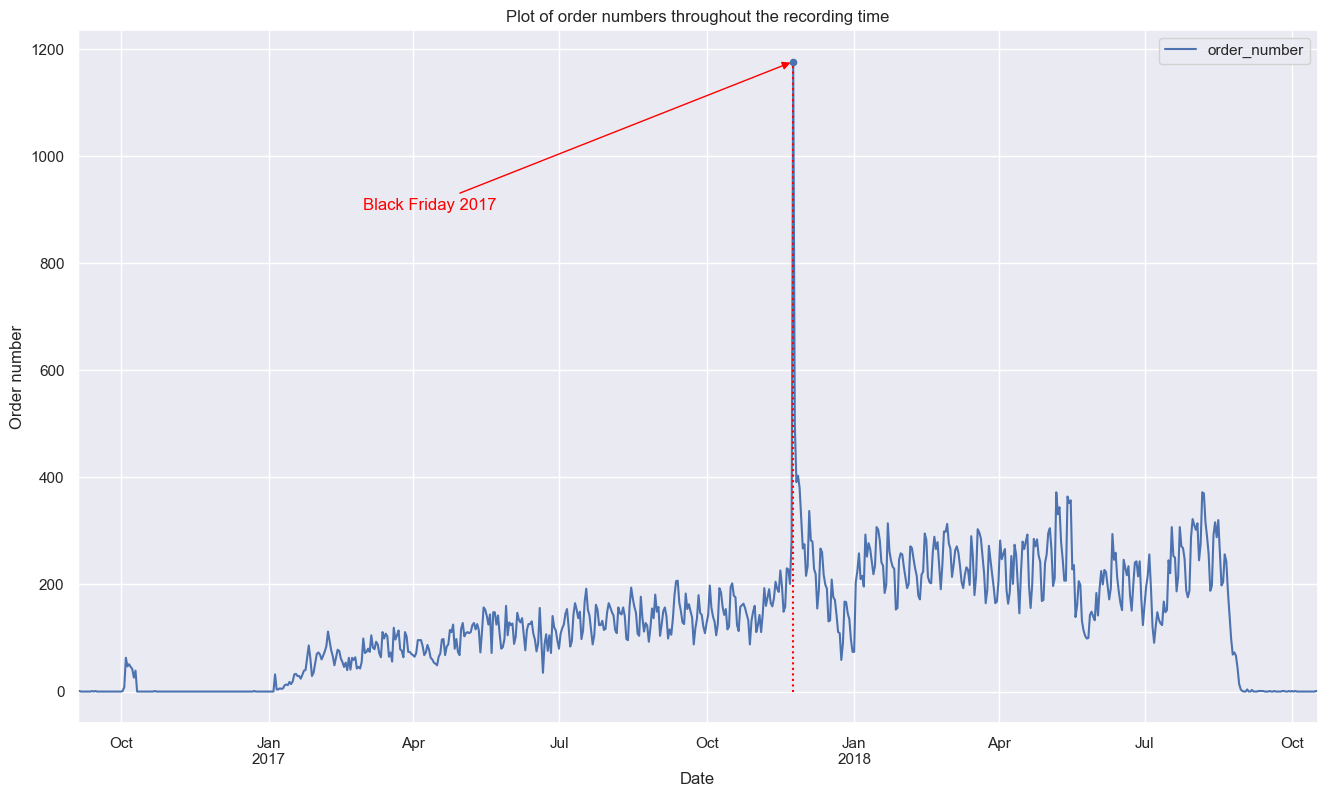

In [7]:
black_friday_2017 = '2017-11-24 00:00:00'
orders_res.plot(title='Plot of order numbers throughout the recording time', xlabel='Date', ylabel='Order number', figsize=(16, 9))
plt.vlines(x=black_friday_2017, ymin=orders_res['order_number'].min(), ymax=orders_res['order_number'].max(), color='red', linestyle=':')
plt.scatter(x=[black_friday_2017], y=[orders_res['order_number'].max()], s=20, zorder=2)
plt.annotate('Black Friday 2017', xy=[black_friday_2017, orders_res['order_number'].max()], xytext=['2017-03-01 00:00:00', 900], arrowprops=dict(arrowstyle='-|>', color='red'), color='red')

Text(2017-03-01 00:00:00, 900, 'Black Friday 2017')

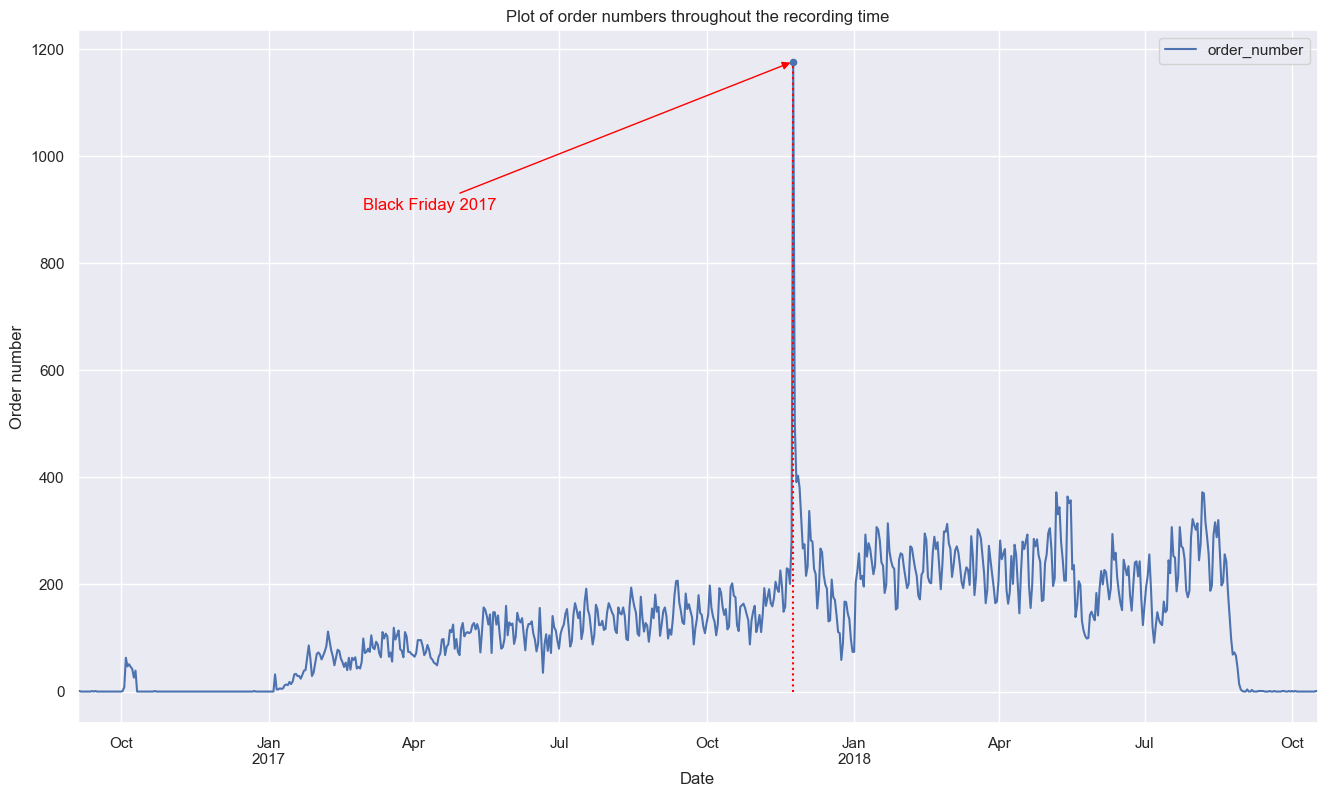

In [8]:
black_friday_2017 = '2017-11-24 00:00:00'

orders_res.plot(title='Plot of order numbers throughout the recording time', xlabel='Date', ylabel='Order number', figsize=(16, 9))
plt.vlines(x=black_friday_2017, ymin=orders_res['order_number'].min(), ymax=orders_res['order_number'].max(), color='red', linestyle=':')
plt.scatter(x=[black_friday_2017], y=[orders_res['order_number'].max()], s=20, zorder=2)
plt.annotate('Black Friday 2017', xy=[black_friday_2017, orders_res['order_number'].max()], xytext=['2017-03-01 00:00:00', 900], arrowprops=dict(arrowstyle='-|>', color='red'), color='red')

We have date for period since September 2016 to October 2018 but it seems that data was actively collected only since January 2017 to September 2018. Also we can see a spike on Black Friday 2018. We need to keep in mind that on Black Friday people orders the most frequently

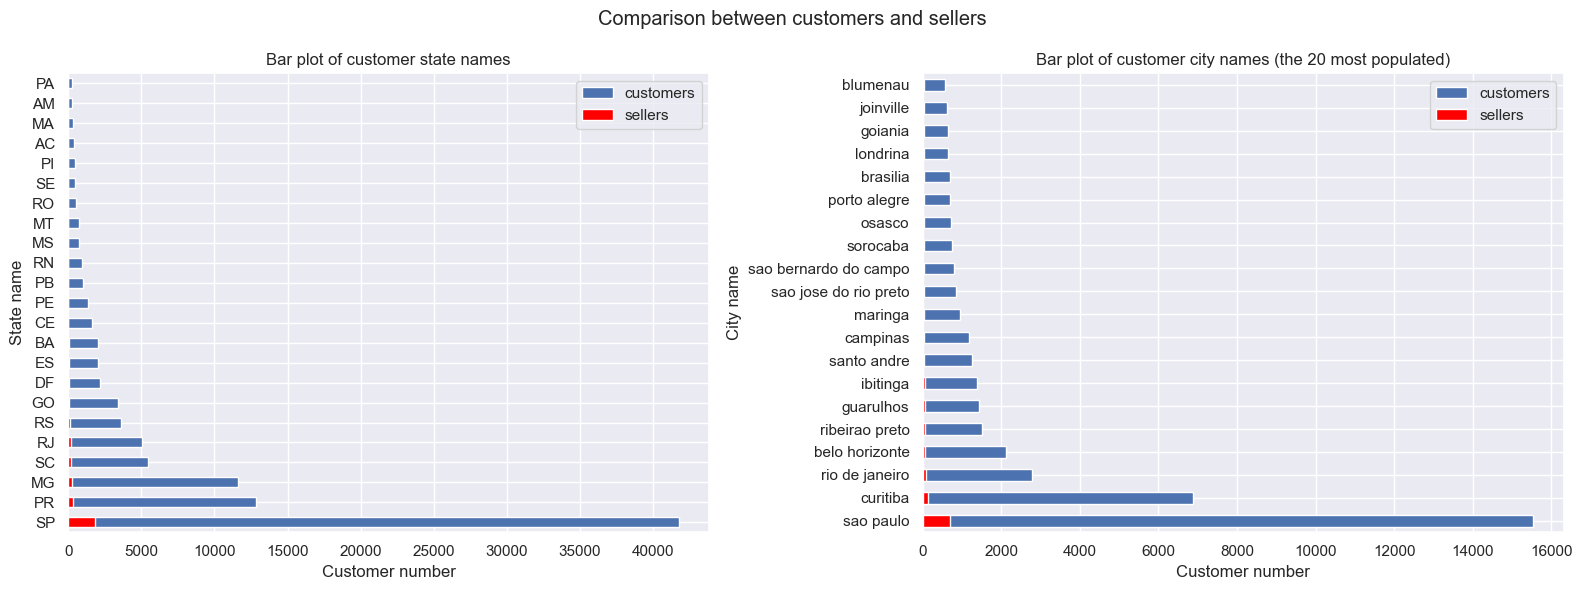

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

customers['customer_state'].value_counts().plot(kind='barh', ax=axes[0], label='customers')
sellers['seller_state'].value_counts().plot(kind='barh', ax=axes[0], color='red', label='sellers')
axes[0].set_xlabel('Customer number')
axes[0].set_ylabel('State name')
axes[0].set_title('Bar plot of customer state names')
axes[0].legend()

customers['customer_city'].value_counts()[:20].plot(kind='barh', ax=axes[1], label='customers')
sellers['seller_city'].value_counts()[:20].plot(kind='barh', ax=axes[1], color='red', label='sellers')
axes[1].set_xlabel('Customer number')
axes[1].set_ylabel('City name')
axes[1].set_title('Bar plot of customer city names (the 20 most populated)')
axes[1].legend()

fig.suptitle('Comparison between customers and sellers')
fig.tight_layout()

In [10]:
products.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_length  product_description_length  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

Text(0.5, 1.0, 'Pairplot of products numerical features')

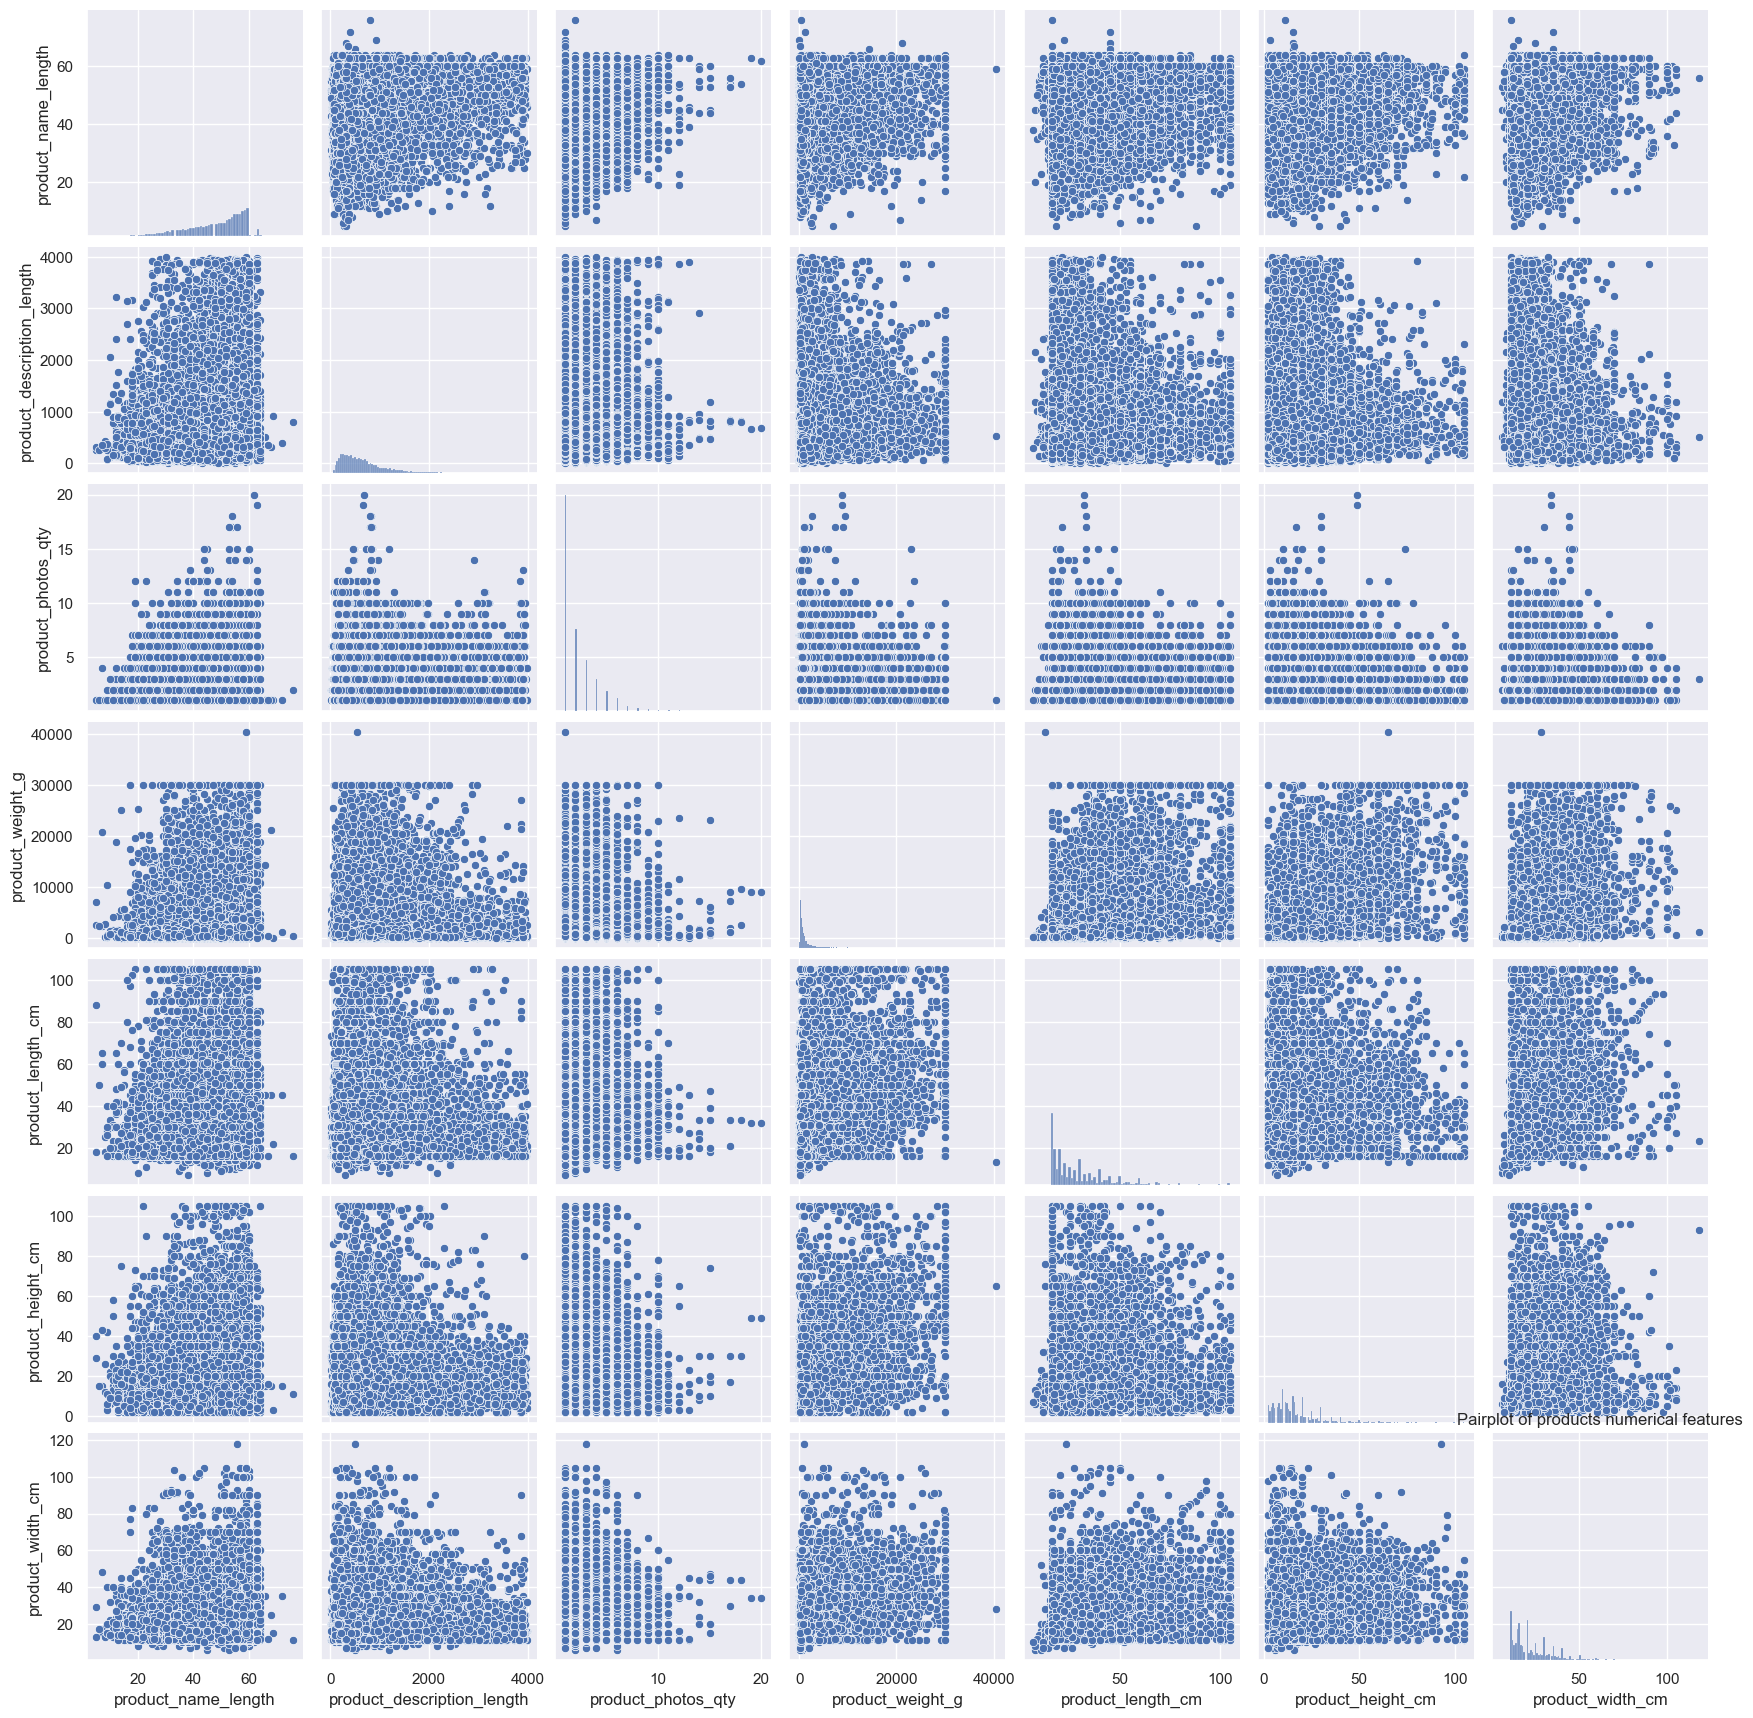

In [11]:
sns.pairplot(products)
plt.title('Pairplot of products numerical features')

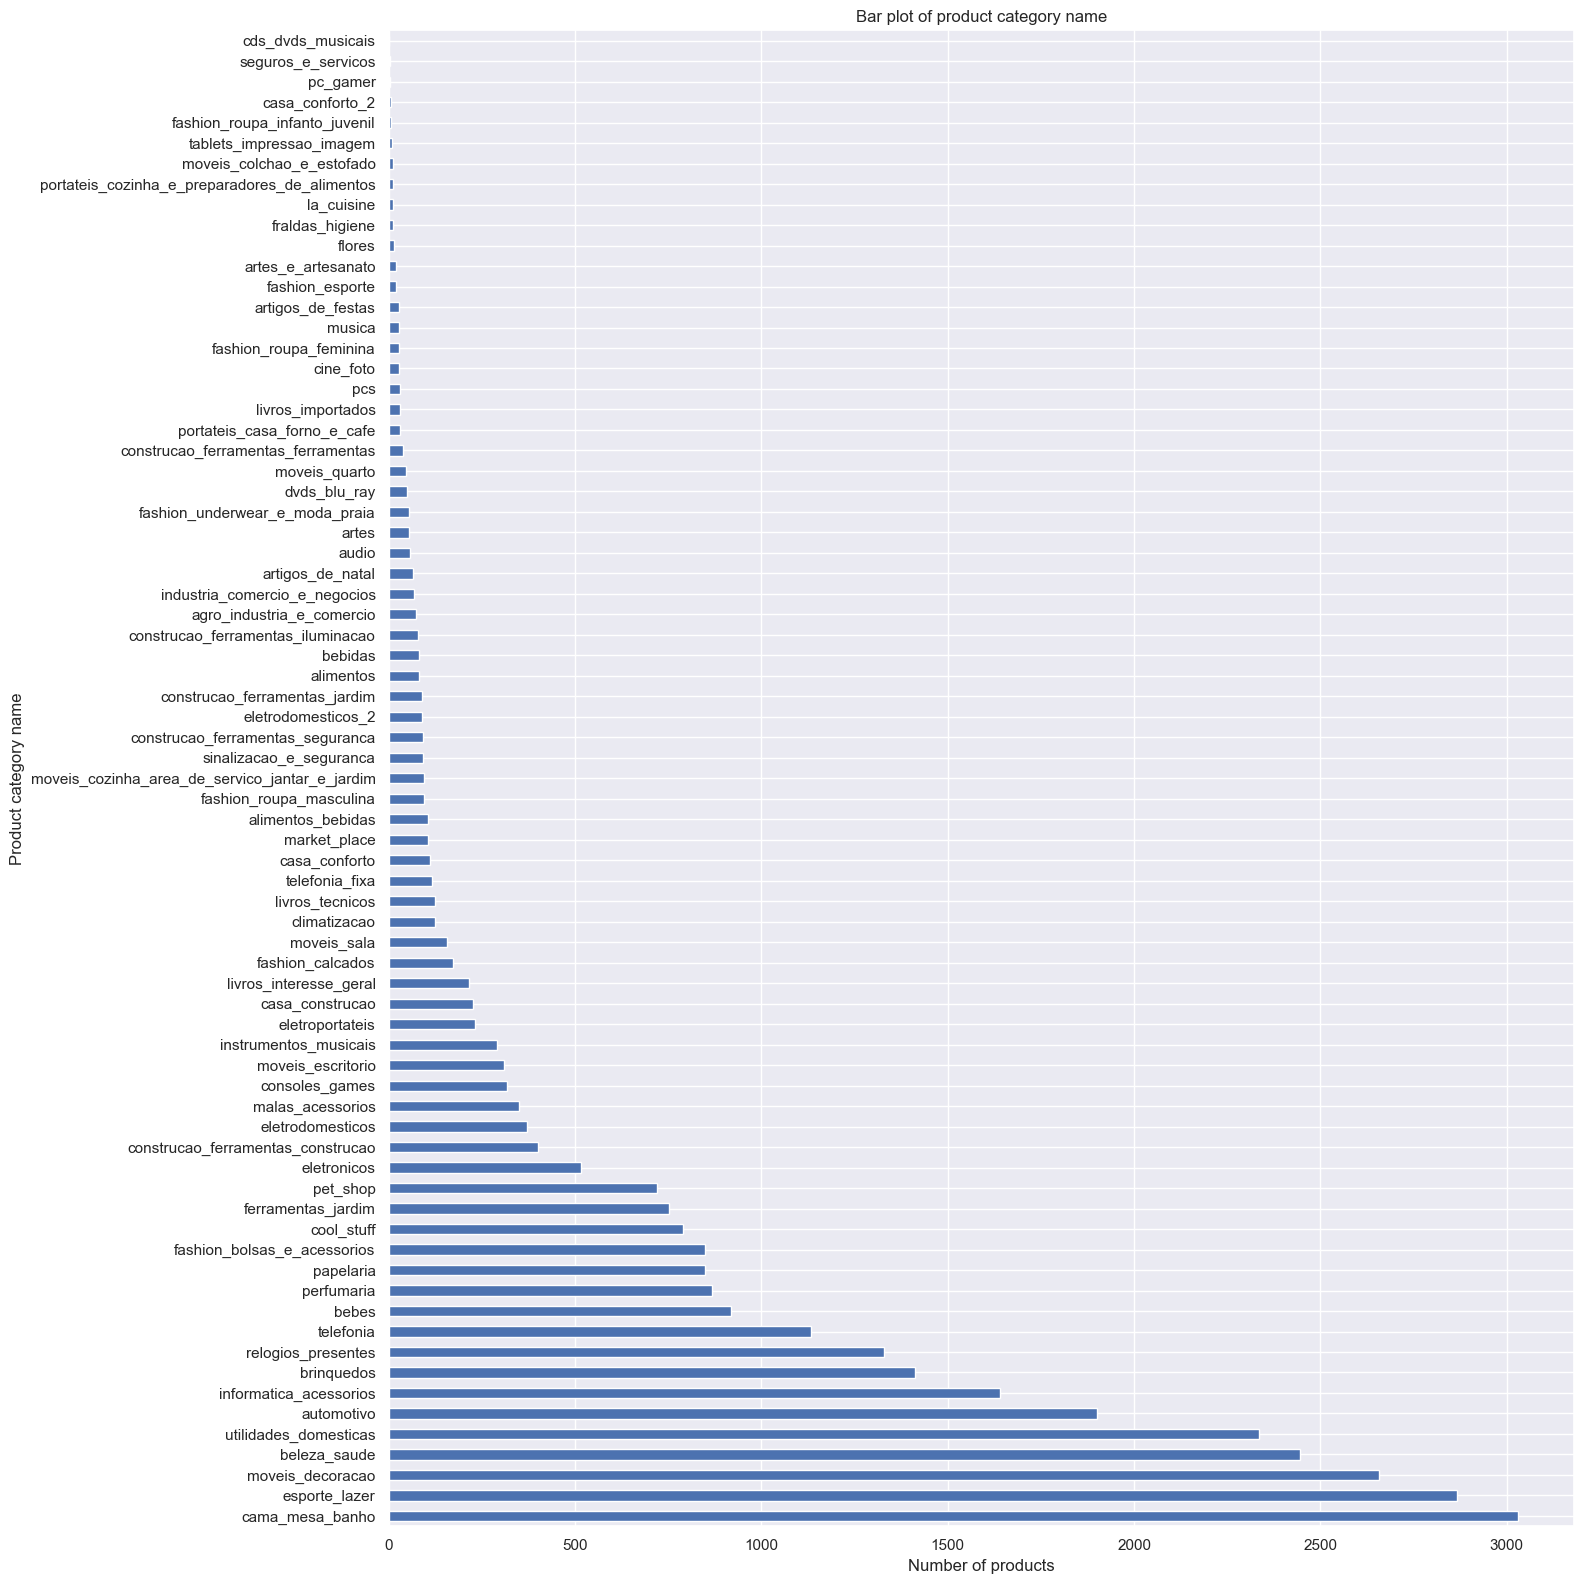

In [12]:
products['product_category_name'].value_counts().plot(kind='barh', figsize=(16, 16))
plt.xlabel('Number of products')
plt.ylabel('Product category name')
plt.title('Bar plot of product category name')
plt.tight_layout()

Let's see every 500-th geolocation from the dataset

In [13]:
# define the world map
world_map = folium.Map()

# instantiate a feature group
group = folium.map.FeatureGroup()

# loop through the geolocations and add each to the feature group
loop = zip(geolocation['geolocation_lat'][::500], geolocation['geolocation_lng'][::500])
for lat, lng, in loop:
    group.add_child(
        folium.vector_layers.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add geolocations to map
world_map.add_child(group)

How we can see all geolocations are located in Brazil. Now let's get back to orders and merge them with other dataframes

In [14]:
pd.merge(orders, order_items, on='order_id').head(3)

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date  order_item_id  \
0                    2017-10-18              1   
1                    2018-08-13              1   
2                    2018-09-04              1   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
2  aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   

  shipping_limit_date   price  freight_value  
0 2017-10-06 11:07:15   29.99           8.72  
1 2018-07-30 03:24:27  118.70          22.76  
2 2018-08-13 08:55:23  159.90          19.22

In [15]:
orders \
    .merge(order_items, on='order_id') \
    .merge(sellers, on='seller_id') \
    .merge(order_payments, on='order_id') \
    .merge(products, on='product_id') \
    .merge(customers, on='customer_id') \
    .head(3)

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   

  order_estimated_delivery_date  order_item_id  \
0                    2017-10-18              1   
1                    2017-10-18              1   
2                    2017-10-18              1   

                         product_id  ... product_description_length  \
0  87285b34884572647811a353c7ac498a  ...                      268.0   
1  87285b34884572647811a353c7ac498a  ...                      268.0   
2  87285b34884572647811a353c7ac498a  ...                      268.0   

  product_photos_qty  product_weight_g  product_length_cm  product_height_cm  \
0                4.0             500.0               19.0                8.0   
1                4.0             500.0               19.0                8.0   
2                4.0             500.0               19.0                8.0   

  product_width_cm                customer_unique_id  \
0             13.0  7c396fd4830fd04220f754e42b4e5bff   
1             13.0  7c396fd4830fd04220f754e42b4e5bff   
2             13.0  7c396fd4830fd04220f754e42b4e5bff   

   customer_zip_code_prefix customer_city  customer_state  
0                      3149     sao paulo              SP  
1                      3149     sao paulo              SP  
2                      3149     sao paulo              SP  

[3 rows x 33 columns]

In [16]:
# orders.head(1)

In [17]:
# order_items.head(1)

In [18]:
# order_payments.head(1)

In [19]:
# order_reviews.head(1)

In [20]:
print(f'Length of orders = {len(orders)}')
print(f'Length of order_items = {len(order_items)}')
print(f'Length of order_payments = {len(order_payments)}')
print(f'Length of order_reviews = {len(order_reviews)}')

Length of orders = 99441
Length of order_items = 112650
Length of order_payments = 103886
Length of order_reviews = 100000


Text(0.5, 1.0, 'Plot of the first 15 groups')

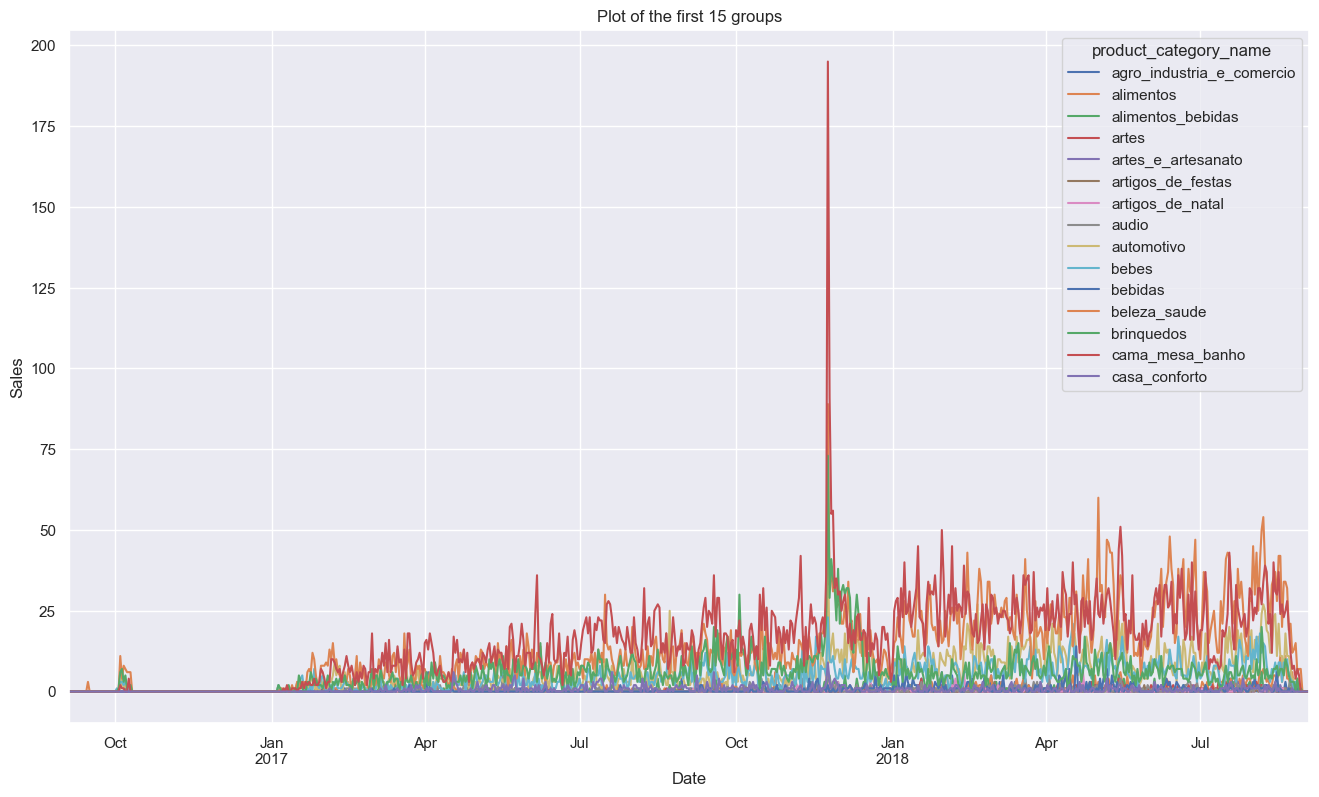

In [21]:
groups = products['product_category_name']

df = orders.merge(order_items, on='order_id') \
           .merge(products, on='product_id')
df.index = df['order_purchase_timestamp']
df = df.groupby('product_category_name').resample('1d').agg({
    'product_category_name': 'size'
}).rename(columns={'product_category_name': 'sales'})
df = df.unstack().T
df = df.fillna(0)
df = df.reset_index().drop(['level_0'], axis=1).set_index('order_purchase_timestamp')

df.iloc[:, :15].plot(figsize=(16, 9))
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Plot of the first 15 groups')

In [22]:
groups = products['product_category_name']

df = orders.merge(order_items, on='order_id') \
           .merge(products, on='product_id')
df.index = df['order_purchase_timestamp']
df = df.groupby('product_category_name').resample('1d').agg({
    'product_category_name': 'size'
}).rename(columns={'product_category_name': 'sales'}).reset_index()

df['weekend'] = np.where(df['order_purchase_timestamp'].dt.day_name().isin(['Sunday', 'Saturday']), 1, 0)

In [23]:
start_date = df['order_purchase_timestamp'].min()
end_date = df['order_purchase_timestamp'].max()

def expand_date(category_df, category):
    before_date = category_df['order_purchase_timestamp'].min()
    after_date = category_df['order_purchase_timestamp'].max()

    before_indexes = pd.date_range(start_date, before_date - pd.DateOffset(1))
    after_indexes = pd.date_range(after_date + pd.DateOffset(1), end_date)

    before_df = pd.DataFrame({
        'product_category_name': category,
        'order_purchase_timestamp': before_indexes,
        'sales': np.nan,
        'weekend': np.nan
    })
    
    after_df = pd.DataFrame({
        'product_category_name': category,
        'order_purchase_timestamp': after_indexes,
        'sales': np.nan,
        'weekend': np.nan
    })

    before_df['weekend'] = np.where(before_df['order_purchase_timestamp'].dt.day_name().isin(['Sunday', 'Saturday']), 1, 0)
    after_df['weekend'] = np.where(after_df['order_purchase_timestamp'].dt.day_name().isin(['Sunday', 'Saturday']), 1, 0)

    temp_df = pd.concat([before_df, category_df, after_df], axis=0)
    
    return temp_df.reset_index(drop=True)

In [24]:
new_df = pd.DataFrame({
    'product_category_name': [],
    'order_purchase_timestamp': [],
    'sales': [],
    'weekend': []
})

for category in df['product_category_name'].unique():
    temp_df = expand_date(df[df['product_category_name'] == category], category)
    new_df = pd.concat([new_df, temp_df], axis=0)

new_df = new_df.reset_index(drop=True)

In [25]:
len(new_df) == len(pd.date_range(start_date, end_date)) * new_df['product_category_name'].nunique()

True

# **Data preprocessing / Feature engineering**

In [26]:
def is_holiday(date_to_check):
    br_holidays = holidays.Brazil()
    return date_to_check in br_holidays

In [27]:
window_size = 14

for i in range(1, window_size+1):
    new_df[f'sales-(i-{i})'] = new_df['sales'].shift(i)

brazil_holidays = holidays.Brazil()
new_df['holiday'] = new_df['order_purchase_timestamp'].apply(is_holiday)

# **Classic Model (SARIMA)** <a id='5'></a>

SARIMA model are chosen for demand forecasting because they excel at capturing seasonal patterns, leveraging autocorrelations in the data, and providing reliable forecasts with a clear statistical foundation. They are particularly suitable when historical demand data displays clear seasonal cycles and when accurate short to medium-term forecasts are needed

In [29]:
categories = new_df['product_category_name'].unique()
d = {category: None for category in categories}
models_sarima = {}

for category in tqdm(categories):
    sarima = SARIMAX(new_df[new_df['product_category_name'] == category]['sales'].values, order=(5,0,1), seasonal_order=(0,0,0,12))
    models_sarima[category] = sarima
    predicted = sarima.fit().predict()
    d[category] = predicted

 37%|███▋      | 27/73 [00:09<00:15,  2.96it/s]C:\Users\melni\.conda\envs\coursework\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 79%|███████▉  | 58/73 [00:21<00:07,  1.94it/s]C:\Users\melni\.conda\envs\coursework\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 82%|████████▏ | 60/73 [00:22<00:06,  2.07it/s]C:\Users\melni\.conda\envs\coursework\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
100%|██████████| 73/73 [00:27<00:00,  2.63it/s]


In [30]:
d['ts'] = new_df['order_purchase_timestamp'].unique()
info_df = pd.DataFrame(d)
info_df.index = info_df['ts']
info_df = info_df.add_prefix('sarima_')


for category in tqdm(categories):
    info_df[f'actual_{category}'] = expand_date(df[df['product_category_name'] == category], category)['sales'].values

100%|██████████| 73/73 [00:00<00:00, 109.98it/s]


Text(0.5, 0.9, '36 most sold prediction')

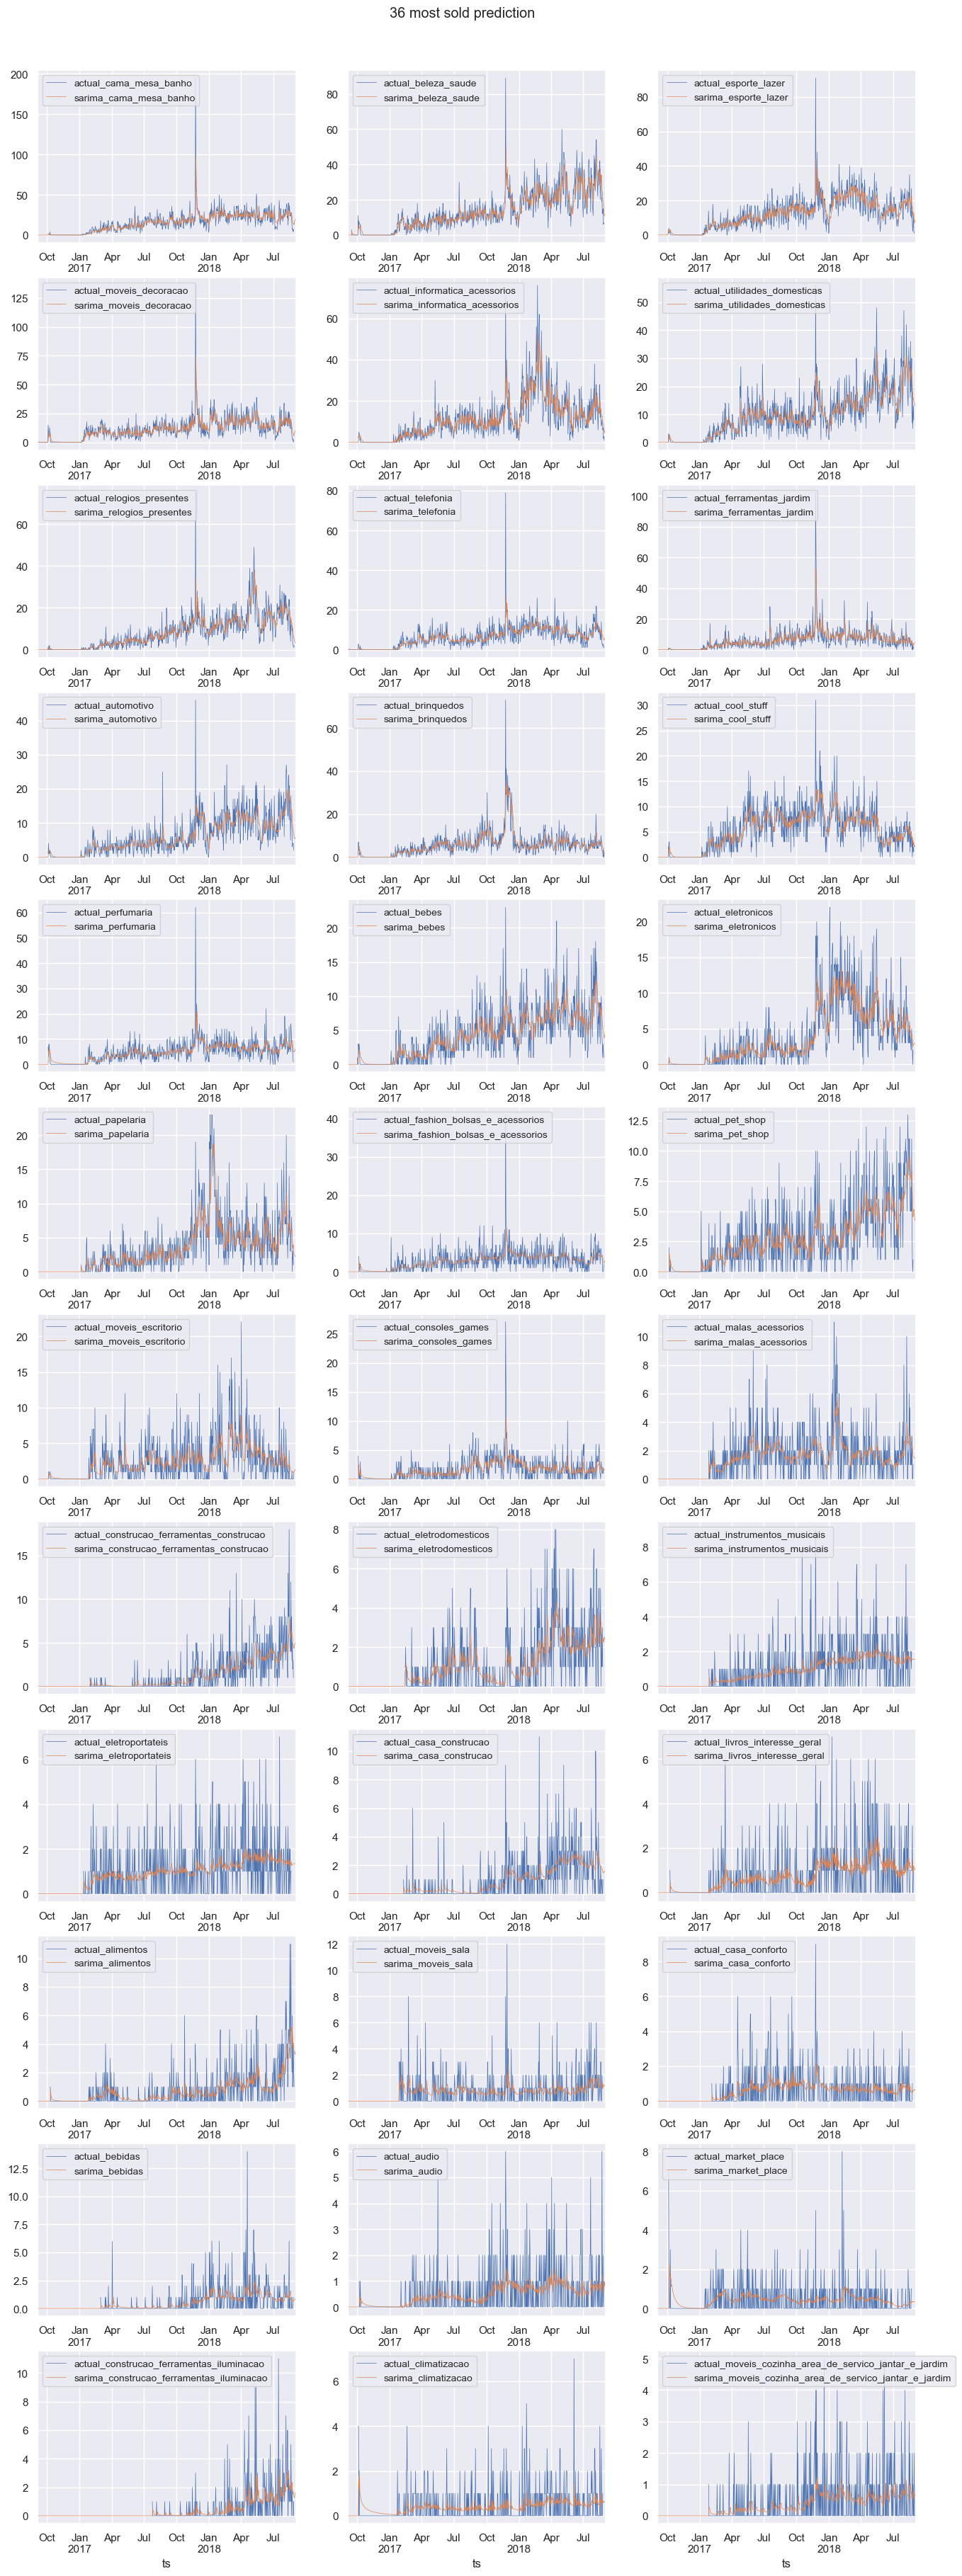

In [31]:
rows, cols = 12, 3
fig, axes = plt.subplots(rows, cols, figsize=(16, 45))

k = 0

most_populated_36 = new_df.groupby('product_category_name').agg({
    'sales': 'sum'
}).sort_values(by='sales', ascending=False)[:36].index

for i in range(rows):
    for j in range(cols):
        category = most_populated_36[k]
        info_df[[f'actual_{category}', f'sarima_{category}']].plot(ax=axes[i, j], lw=.5)
        axes[i, j].legend(fontsize=10, loc='upper left')
        k += 1

fig.suptitle('36 most sold prediction', y=0.9)

In [32]:
dates = pd.date_range(end_date + pd.DateOffset(1), end_date + pd.DateOffset(21))

res = {}

salima_pred = pd.DataFrame({
    'product_category_name': [],
    'order_purchase_timestamp': [],
    'sales': [],
    'weekend': []
})

for category in tqdm(categories):
    res[category] = models_sarima[category].fit().forecast(steps=21)

    temp_df = pd.DataFrame({
        'product_category_name': np.full((len(dates),), category),
        'order_purchase_timestamp': dates,
        'sales': res[category],
        'weekend': np.nan
    })

    temp_df['weekend'] = np.where(temp_df['order_purchase_timestamp'].dt.day_name().isin(['Sunday', 'Saturday']), 1, 0)
    temp_df['holiday'] = temp_df['order_purchase_timestamp'].apply(is_holiday)

    salima_pred = pd.concat([salima_pred, temp_df], axis=0)

salima_pred = salima_pred.reset_index(drop=True)

 37%|███▋      | 27/73 [00:09<00:15,  2.95it/s]C:\Users\melni\.conda\envs\coursework\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 79%|███████▉  | 58/73 [00:20<00:06,  2.28it/s]C:\Users\melni\.conda\envs\coursework\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 82%|████████▏ | 60/73 [00:21<00:05,  2.47it/s]C:\Users\melni\.conda\envs\coursework\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
100%|██████████| 73/73 [00:25<00:00,  2.85it/s]


# **ML approach** <a id='6'></a>

XGBoost is chosen for demand forecasting because of its ability to handle complex relationships in data, provide feature importance insights, scale to large datasets, robustness to outliers, flexibility in optimization, ensemble learning benefits, and strong community support. These factors collectively make XGBoost a powerful and effective choice for accurate and reliable demand forecasting applications

In [33]:
le = LabelEncoder()

new_df['category'] = le.fit_transform(new_df['product_category_name'])
new_df['category'] = new_df['category'].astype('category')

new_df = new_df.fillna(0)

X_le = new_df[['category', 'weekend', 'holiday', *[f'sales-(i-{i})' for i in range(1, 15)]]]
y = new_df['sales']

In [34]:
model_le = XGBRegressor(max_depth=9, enable_categorical=True)
model_le.fit(X_le, y)
le_output = model_le.predict(X_le)
np.sqrt(mean_squared_error(y, le_output))

0.512317244319821

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

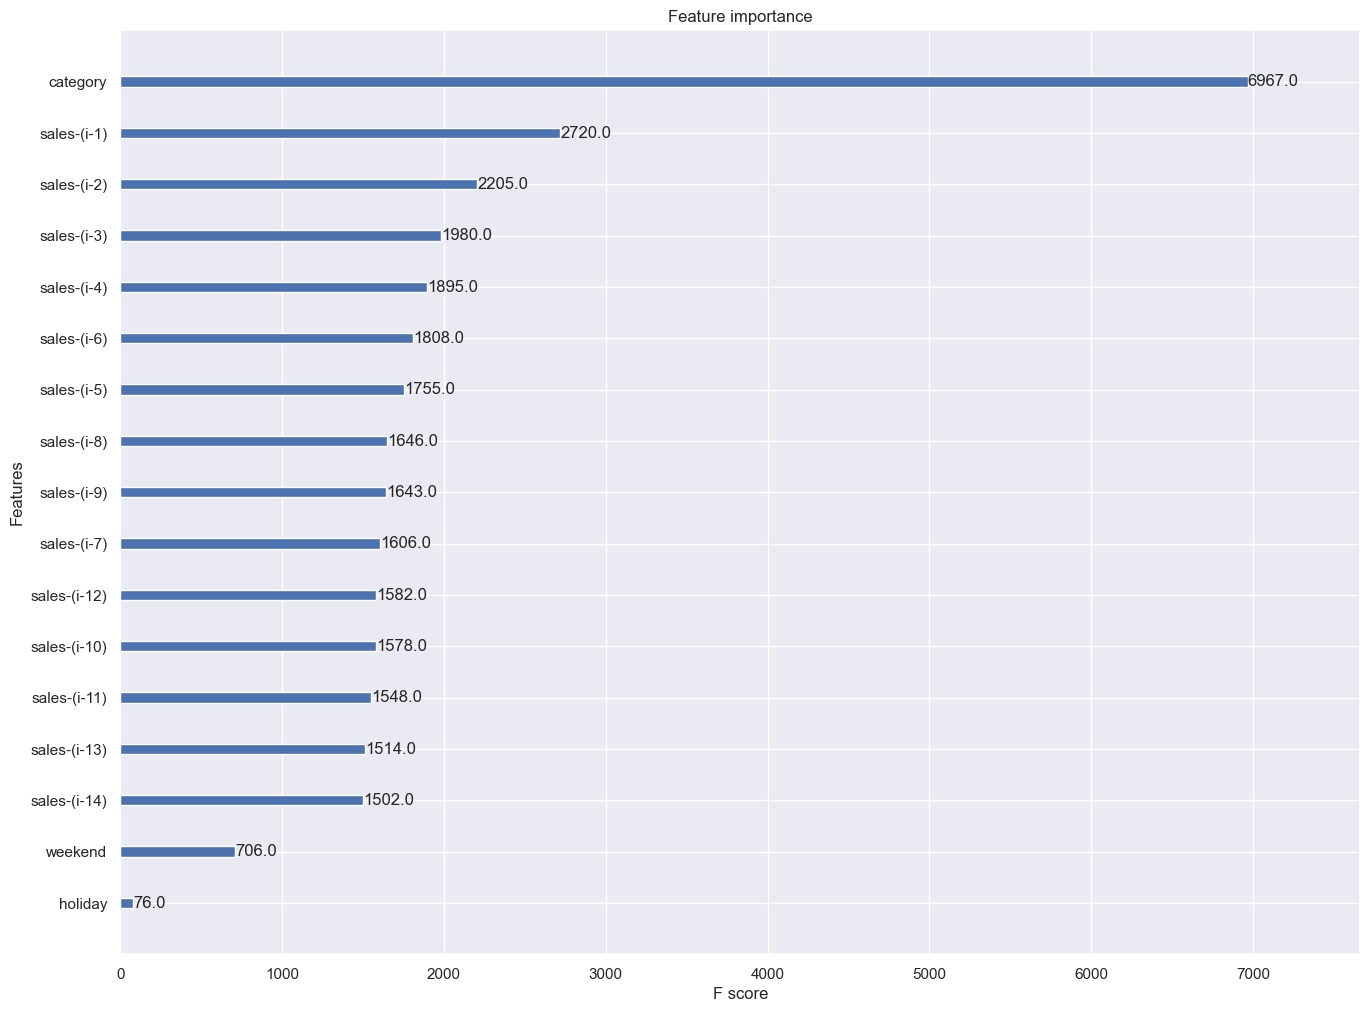

In [35]:
fig, axes = plt.subplots(1, 1, figsize=(16, 12))
plot_importance(model_le, ax=axes)

In [36]:
for category in categories:
    indexes = new_df[new_df['product_category_name'] == category].index
    info_df[f'xgboost_{category}'] = le_output[indexes]

C:\Users\melni\AppData\Local\Temp\ipykernel_21204\494615746.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  info_df[f'xgboost_{category}'] = le_output[indexes]
C:\Users\melni\AppData\Local\Temp\ipykernel_21204\494615746.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  info_df[f'xgboost_{category}'] = le_output[indexes]
C:\Users\melni\AppData\Local\Temp\ipykernel_21204\494615746.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perform

Text(0.5, 0.9, '36 most sold prediction')

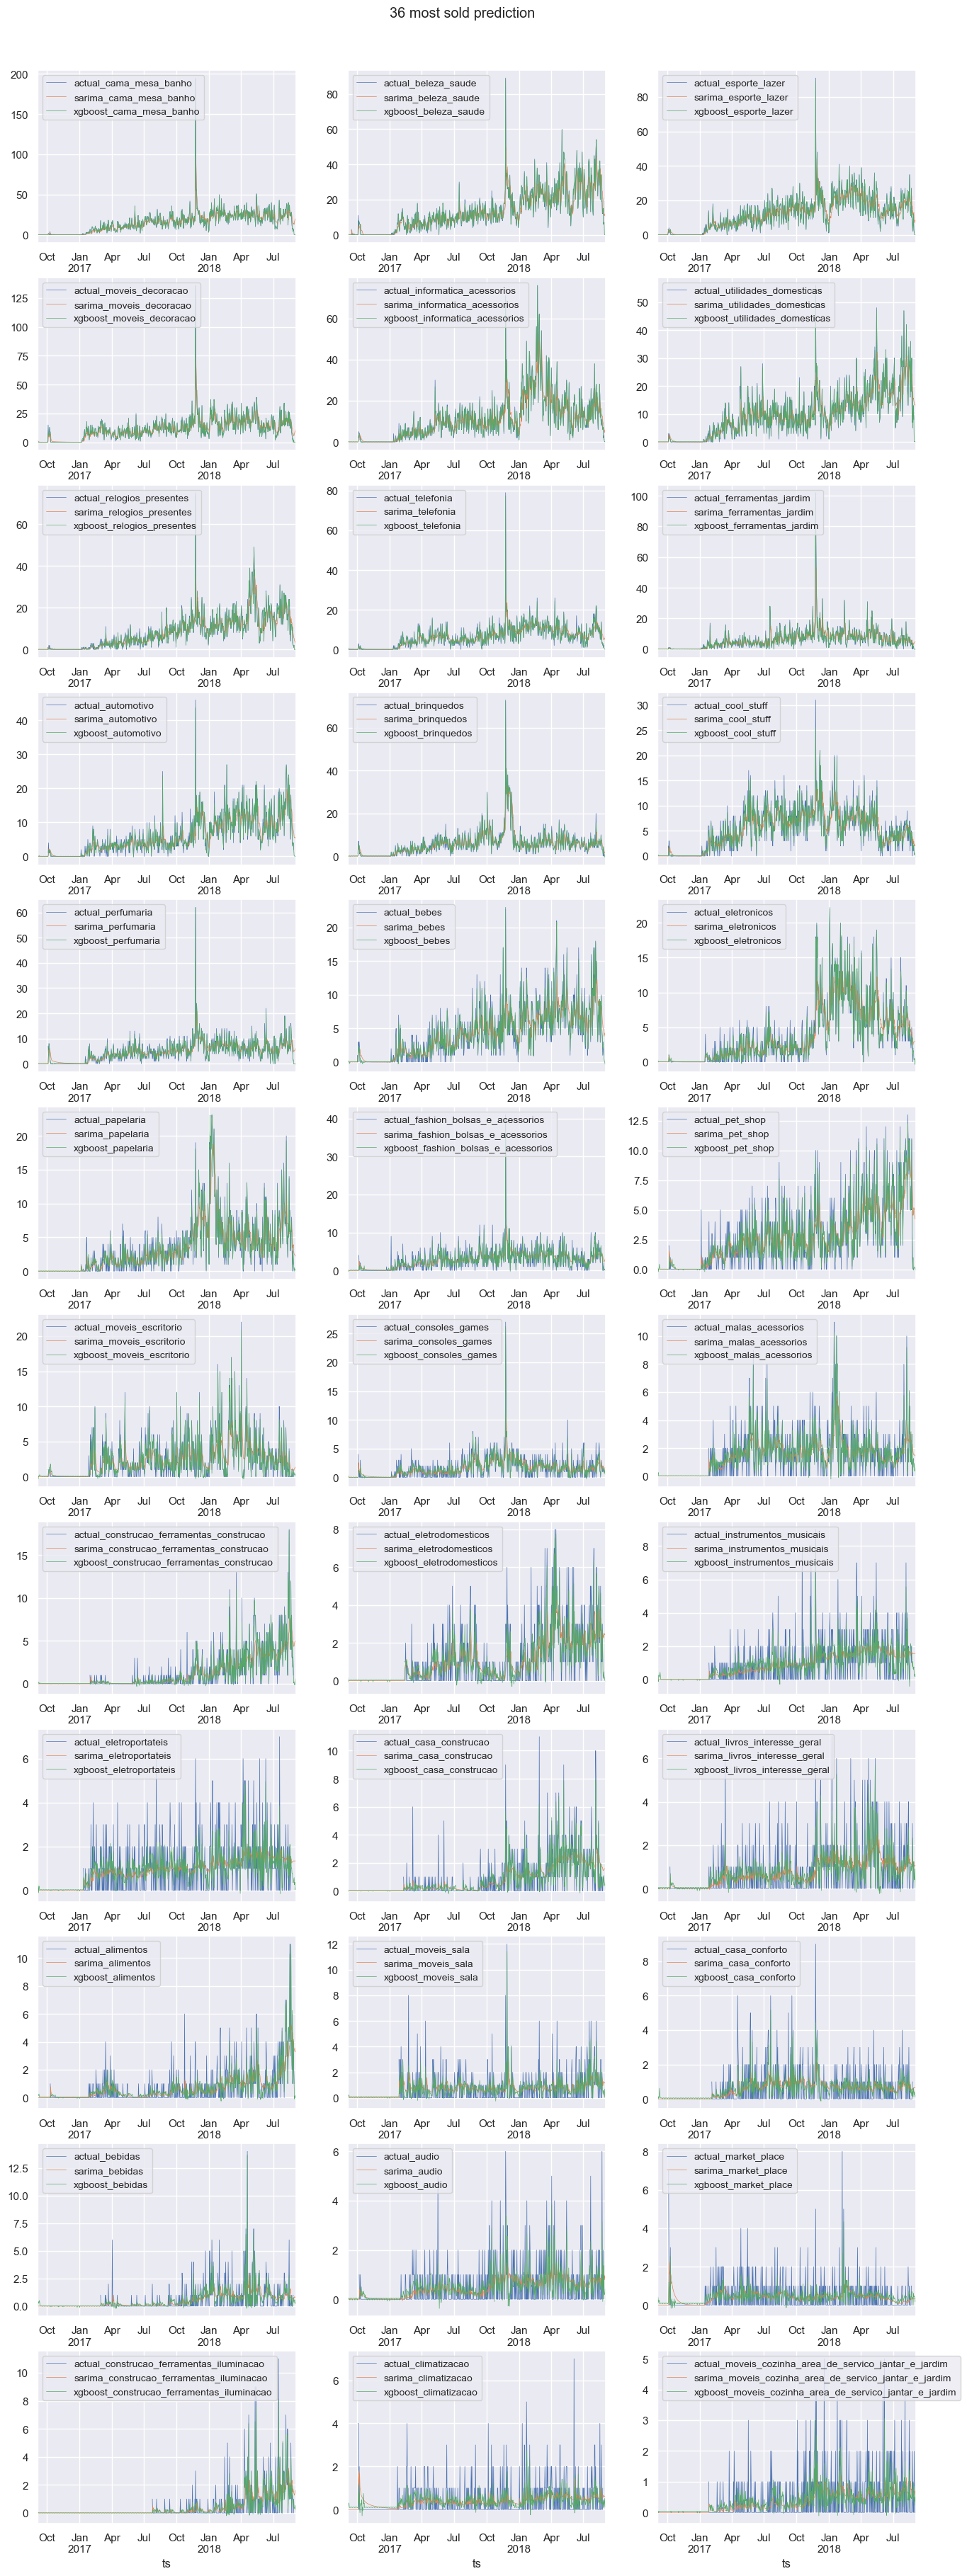

In [37]:
rows, cols = 12, 3
fig, axes = plt.subplots(rows, cols, figsize=(16, 45))

k = 0

for i in range(rows):
    for j in range(cols):
        category = most_populated_36[k]
        info_df[[f'actual_{category}', f'sarima_{category}', f'xgboost_{category}']].plot(ax=axes[i, j], lw=.5)
        axes[i, j].legend(fontsize=10, loc='upper left')
        k += 1

fig.suptitle('36 most sold prediction', y=0.9)

In [38]:
def predict_for_days(df, model, days=21):
    df2 = df.copy()

    for day in range(1, days+1):
        print(day)
        now_date = end_date + pd.DateOffset(day)
        
        rows = {
            # 'order_purchase_timestamp': [],
            'category': [],
            'weekend': [],
            'holiday': [],
        }
        
        for i in range(1, 15):
            rows[f'sales-(i-{i})'] = []
        
        row = {}
        
        # Don't dependent on a category
        # row['order_purchase_timestamp'] = now_date
        row['weekend'] = np.where(pd.Series([now_date]).dt.day_name().isin(['Sunday', 'Saturday']), 1, 0)[0]
        row['holiday'] = is_holiday(now_date)
        
        for category_id in range(len(categories)):
            row['category'] = category_id
            row['sales-(i-1)'] = df2[(df2['category'] == category_id) & (df2['order_purchase_timestamp'] == (now_date - pd.DateOffset(1)))]['sales'].values[0]
        
            for i in range(2, 15):
                # print(df2[df2['order_purchase_timestamp'] == (now_date - pd.DateOffset(1))])
                row[f'sales-(i-{i})'] = df2[df2['order_purchase_timestamp'] == (now_date - pd.DateOffset(1))][f'sales-(i-{i-1})'].values[0]
            
            for key in row:
                rows[key].append(row[key])
        
        temp_df = pd.DataFrame(rows)
        temp_df['category'] = temp_df['category'].astype('category')
        
        temp_df['sales'] = model_le.predict(temp_df)
        
        temp_df['order_purchase_timestamp'] = now_date
        temp_df['product_category_name'] = le.inverse_transform(temp_df['category'])
        
        df2 = pd.concat([df2, temp_df], axis=0).reset_index(drop=True)
    
    return df2.tail(days * len(categories)).reset_index(drop=True)[['product_category_name', 'order_purchase_timestamp', 'sales']]

In [39]:
predicted_xgboost = predict_for_days(new_df, model_le, days=21)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


In [40]:
info_df2 = {}

for category in categories:
    indexes_xgboost = predicted_xgboost[predicted_xgboost['product_category_name'] == category].index
    indexes_salima = salima_pred[salima_pred['product_category_name'] == category].index
    info_df2[f'xgboost_{category}'] = predicted_xgboost.iloc[indexes_xgboost]['sales'].values
    info_df2[f'sarima_{category}'] = salima_pred.iloc[indexes_salima]['sales'].values

info_df2['ts'] = pd.date_range(end_date + pd.DateOffset(1), end_date + pd.DateOffset(21)).values
info_df2 = pd.DataFrame(info_df2)
info_df2.index = info_df2['ts']

прогнозування попиту на 
короткостроковий період (14 днів) через 7 днів від останньої дати  
даних, для всіх груп товарі.

Text(0.5, 0.9, '36 most sold prediction')

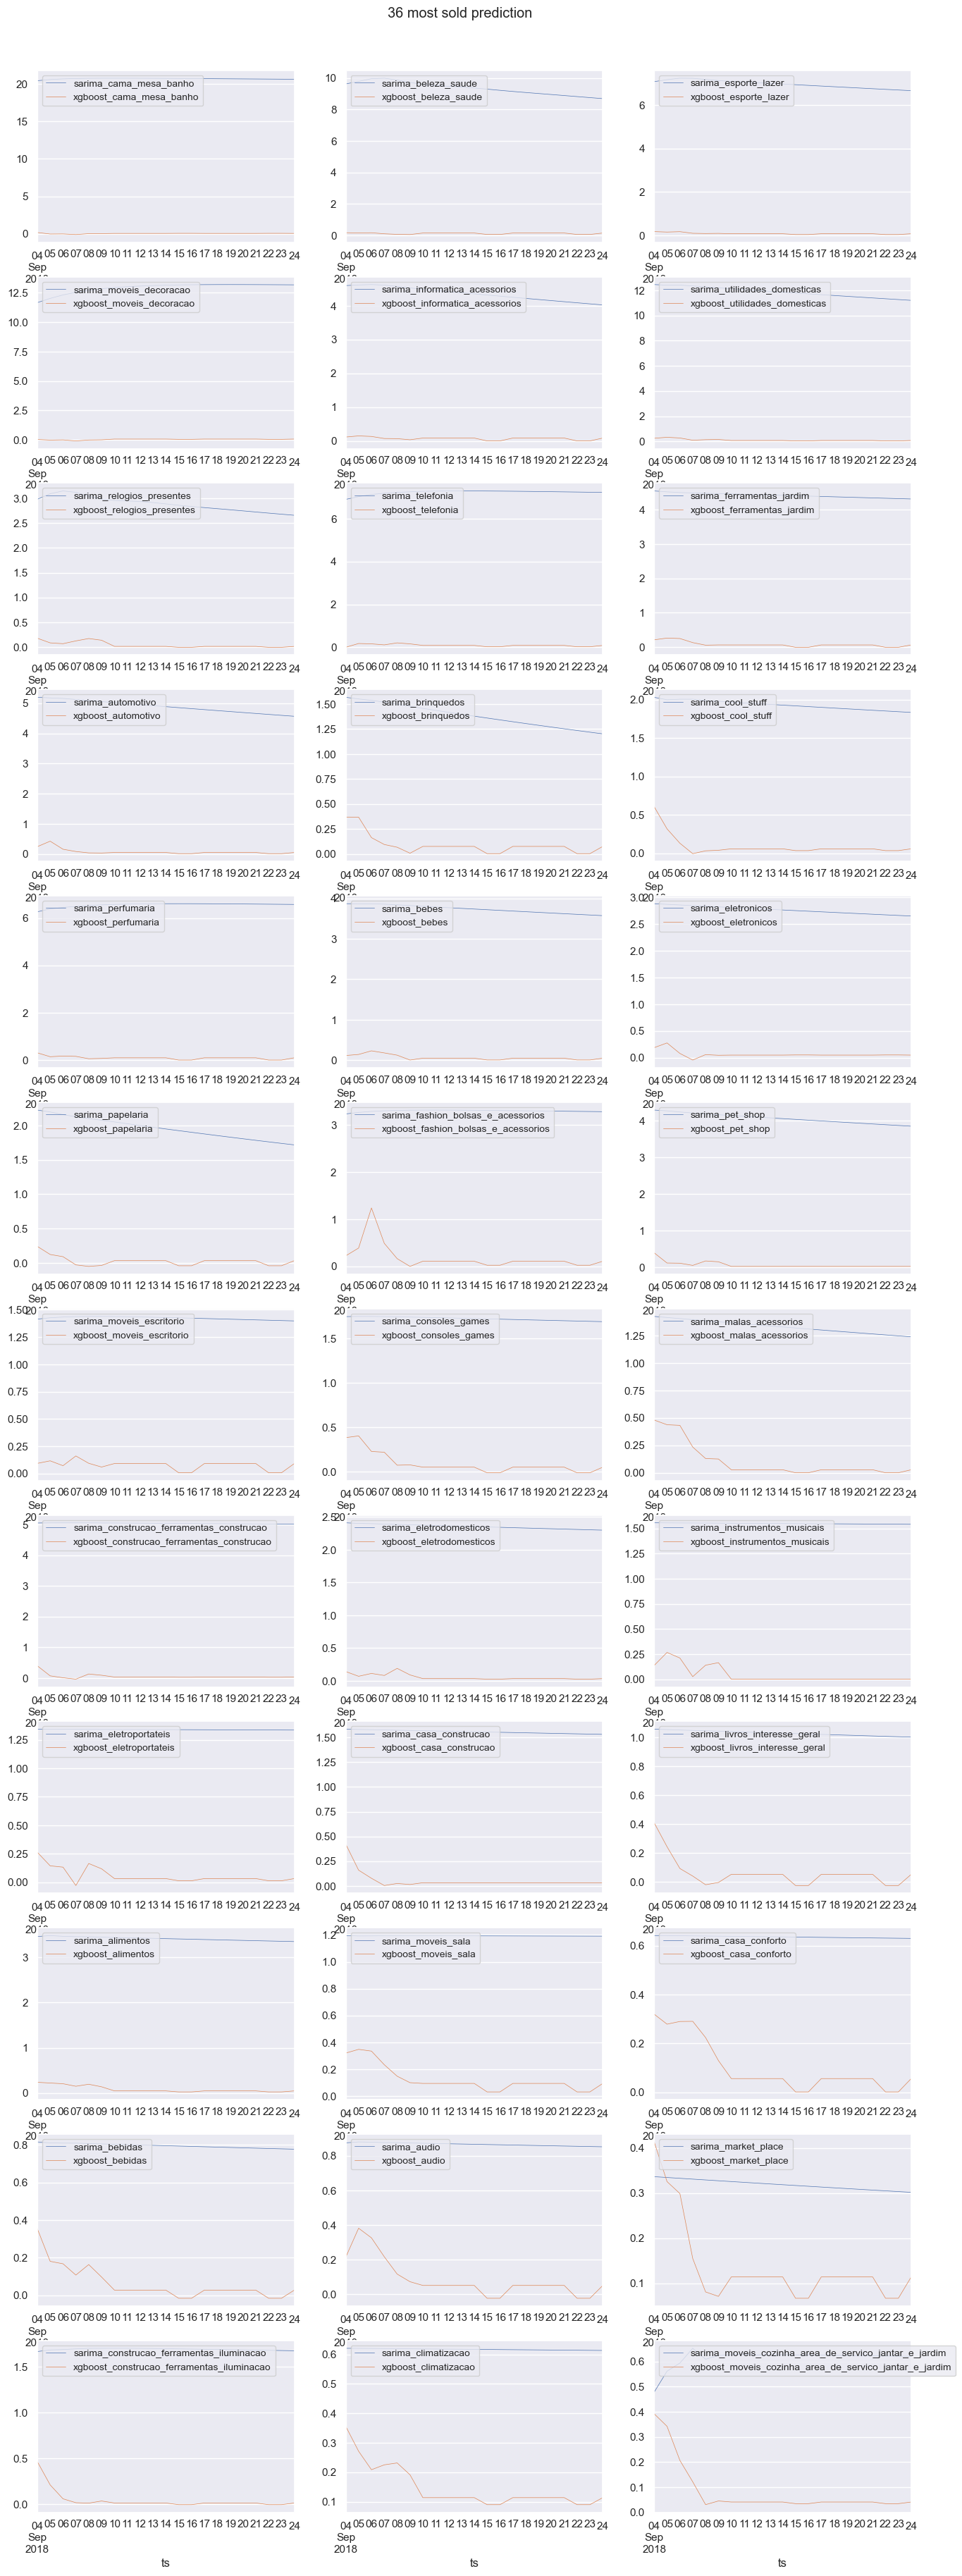

In [41]:
rows, cols = 12, 3
fig, axes = plt.subplots(rows, cols, figsize=(16, 45))

k = 0

for i in range(rows):
    for j in range(cols):
        category = most_populated_36[k]
        info_df2[[f'sarima_{category}', f'xgboost_{category}']].plot(ax=axes[i, j], lw=.5)
        axes[i, j].legend(fontsize=10, loc='upper left')
        k += 1

fig.suptitle('36 most sold prediction', y=0.9)